# Iris Dataset Analysis  
**Name:** Mary Karago  
**Course:*PLP FEB COHORTng – Data Analysis Assignment  
**Date:** May 5, 2025  

---

## Task 1: Load & Explore the Dataset

In this task, we will:

1. Load a CSV file (`iris.csv`) into a pandas DataFrame  
2. Display the first few rows  
3. Check data types and missing values  
4. Clean the data if necessary  


In [1]:
# Cell 1: Imports & Settings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn style for prettier plots
sns.set(style='whitegrid')


### 1.1 Load the dataset with error handling

We attempt to read `iris.csv`.  
If the file is missing, we show an error message so you can upload it.


In [2]:
# Cell 2: Load Dataset with Error Handling
try:
    df = pd.read_csv(
        'iris.csv',
        header=None,
        names=['sepal_length','sepal_width','petal_length','petal_width','species']
    )
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("ERROR: 'iris.csv' not found. Please upload it to this folder.")
    


Dataset loaded successfully!


### 1.2 Inspect the Data

- Use `.head()` to view the first 5 rows  
- Check `.dtypes` for each column’s type  
- Count missing values with `.isnull().sum()`


In [3]:
# Cell 3: Inspect the Data
# Show first 5 rows
display(df.head())

# Data types
print("\nData types:")
print(df.dtypes)

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


### 1.3 Clean the Data

The Iris dataset has no missing values, but here’s how you would:

- **Drop** rows with missing values: `df.dropna(inplace=True)`  
- **Fill** missing values forward: `df.fillna(method='ffill', inplace=True)`


In [4]:
# Cell 4: Clean Missing Data (if any)
# Here the iris dataset has no missing values, but if it had any:
# Option A: Drop rows with missing values
# df.dropna(inplace=True)
# Option B: Fill missing values forward
# df.fillna(method='ffill', inplace=True)

print("After cleaning, missing values:")
print(df.isnull().sum())


After cleaning, missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## Task 2: Basic Data Analysis

In this task, we will:

1. Compute summary statistics (`.describe()`)  
2. Group by a categorical column (`species`) and compute means  
3. Note any interesting patterns


In [5]:
# Cell 5: Basic Statistical Analysis
print("Basic statistics for numerical columns:")
display(df.describe())


Basic statistics for numerical columns:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observation:**  
- The `mean`, `std`, `min`, `max`, and quartiles are all reported.  
- Use these to understand central tendency and spread.


In [6]:
# Cell 6: Grouping & Aggregation
print("Mean values grouped by species:")
grouped = df.groupby('species').mean()
display(grouped)


Mean values grouped by species:


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


**Pattern Identification:**  
- **Setosa** has much smaller petal dimensions than Versicolor and Virginica.  
- **Versicolor** and **Virginica** show closer petal measures but differ in sepal size.


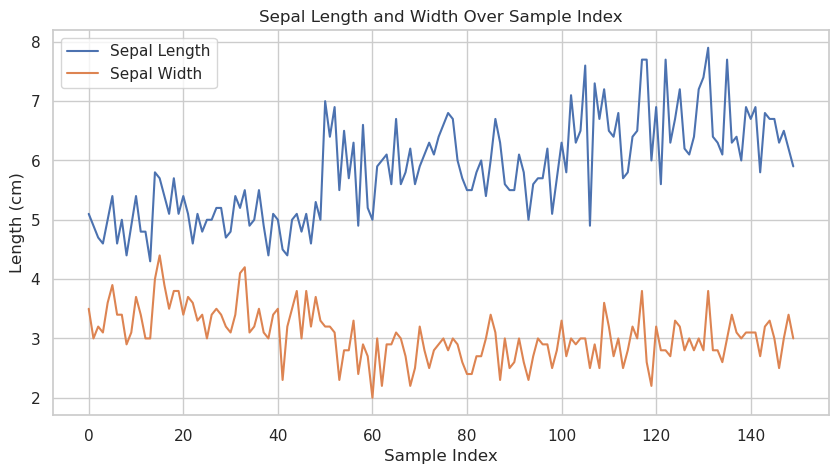

In [7]:
# Cell 7: Line Chart (Sepal Length & Width vs. Sample Index)
plt.figure(figsize=(10,5))
plt.plot(df.index, df['sepal_length'], label='Sepal Length')
plt.plot(df.index, df['sepal_width'],  label='Sepal Width')
plt.title('Sepal Length and Width Over Sample Index')
plt.xlabel('Sample Index')
plt.ylabel('Length (cm)')
plt.legend()
plt.show()


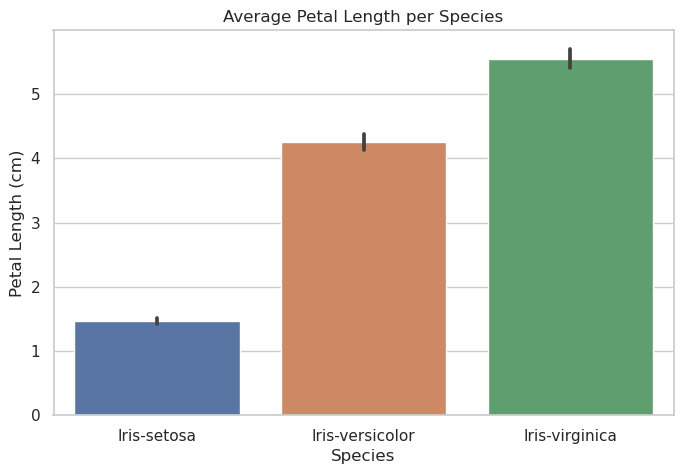

In [8]:
# Cell 8: Bar Chart (Average Petal Length per Species)
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='species', y='petal_length')
plt.title('Average Petal Length per Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()


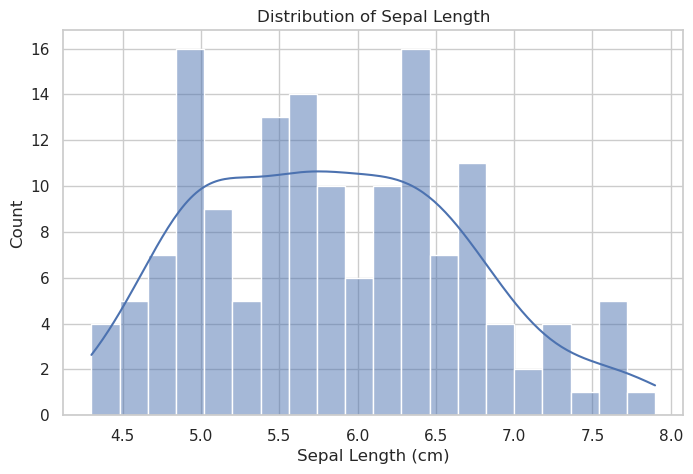

In [9]:
# Cell 9: Histogram (Distribution of Sepal Length)
plt.figure(figsize=(8,5))
sns.histplot(df['sepal_length'], bins=20, kde=True)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.show()


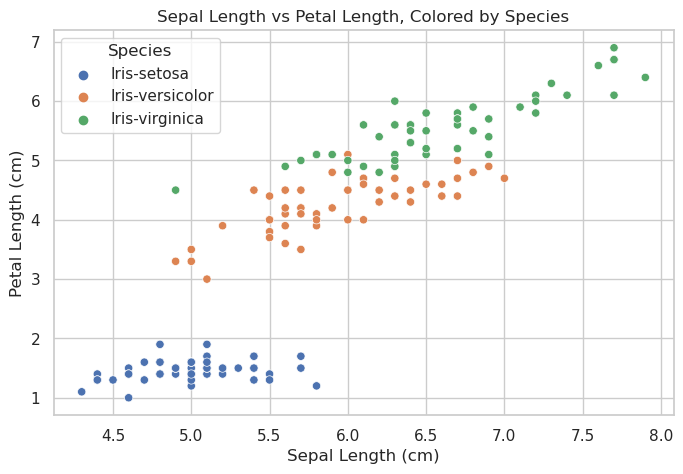

In [10]:
# Cell 10: Scatter Plot (Sepal vs. Petal Length by Species)
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='sepal_length',
    y='petal_length',
    hue='species'
)
plt.title('Sepal Length vs Petal Length, Colored by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.show()


### 2.2 Grouped Analysis and Line Chart Insights

We grouped the dataset by species to calculate the average of each numerical feature. From this, we observe:

- **Setosa** has significantly smaller petal length and width compared to the other species, with a relatively wider sepal.
- **Versicolor** shows moderate values across all features.
- **Virginica** exhibits the highest average petal dimensions and longer sepals, distinguishing it from the others.

These statistics help us understand how each species is characterized, which can be crucial for classification and comparison tasks.

To visually observe how Sepal Length and Sepal Width vary across the dataset, we plotted a line chart over the index (sample number). This helps spot overall trends and fluctuations within each measurement. While the Iris dataset doesn’t contain a time feature, plotting against the index still reveals value changes and possible outliers. We can see consistent ranges per species, giving more context to the grouped means we calculated.
